# Análisis sobre la condición de frontera

De acuerdo con la definición que dimos sobre los autómatas celulares, el espacio $\mathcal{L}$ debe ser regular y discreto, es decir, $\text{dim }(\mathcal{L})=n\times m$ donde $n,m\in\mathbb{Z}$.

Sin embargo, nada nos limita a definir un espacio con "huecos" o espacios donde una célula nunca podra interactuar. Partiendo de está idea nos permitimos realizar la siguiente modificación sobre nuestra regla de evolución para el modelo SIS, la cual tiene impacto directo sobre cada uno de los modelos que hemos trabajado a lo largo del proyecto. De manera general

\begin{equation}
\phi_{ij}^{t+1}(\alpha,\beta)=\left\{\begin{array}{ll}
S & \textrm{si }\rho\leq\frac{\beta}{\alpha}\cdot \frac{\sigma(\mathcal{V}(x_{i,j}),I,t)}{\#\mathcal{V}(x_{i,j})-\sigma(\mathcal{V}(x_{i,j}),V)} \\
I & \textrm{en otro caso}
\end{array}\right.
\end{equation}

donde $\sigma(\mathcal{V}(x_{i,j}),V)$ denota a la cantidad de huecos en la vecindad de la célula $i,j$. De manera análoga cada una de las reglas de evolución que hemos definido implementan esta consideración sobre la definición de $\mathcal{L}$.

A continuación mostraremos los casos particulares que consideramos relevantes para la aplicación de las reglas de evolución que definimos previamente:

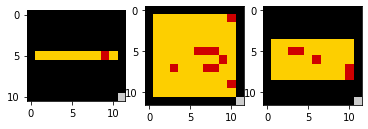

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from EpidemiologicalModels.DefineSpaceInCA import *

# Regiones rectangulares
line = initialCondition(0.1, rectangularBoundary(1, 10, 4, 0, -np.ones((9,10))))  # dim(L) = 1x10
square = initialCondition(0.1, np.zeros((10,10)))  # dim(L) = 10x10.
rectangle = initialCondition(0.1, rectangularBoundary(5,10,3,0,-np.ones((10,10))))  # dim(L) = 5x10

plt.subplot(1,3,1)
plt.imshow(color(line),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
plt.imshow(color(square),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,3)
plt.imshow(color(rectangle),cmap="nipy_spectral", interpolation='nearest')

plt.show()

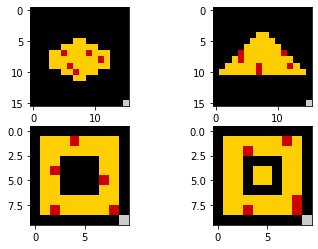

In [2]:
# Regiones definidas a partir de rectangulos
def Rombo(a,b,c,d,M):           
    L = [M]; i = 0
    while c > 1:
        a = a + 2; b = b - 4; c = c - 1; d = d + 2; i = i + 1
        L.append(rectangularBoundary(a,b,c,d,L[i - 1]))
    return L[i]

def Triangulo(n,m,a,b,M):
    L = [M]; i = 0
    while m >= 1:
        i = i + 1
        L.append(rectangularBoundary(n,m,a,b,L[i - 1]))
        m = m - 2; a = a - 1; b = b + 1
    return L[i]

commonBase = rectangularBoundary(2,8,6,0,rectangularBoundary(8,2,0,6,
             rectangularBoundary(8,2,0,0,rectangularBoundary(2,8,0,0,-np.ones((8,8))))))

rombo = initialCondition(0.1, Rombo(1,14,7,0,-np.ones((14,14))))  # dim(L) = 46 células
triangulo = initialCondition(0.1, Triangulo(1,14,9,0,-np.ones((14,14))))  # dim(L) = 56 celdas
fig1 = initialCondition(0.1, commonBase)  # dim(L) = 48 células
fig2 = initialCondition(0.1, rectangularBoundary(2,2,3,3,commonBase))  # dim(L) = 52 celdas

plt.subplot(2,2,1)
plt.imshow(color(rombo),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(2,2,2)
plt.imshow(color(triangulo),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(2,2,3)
plt.imshow(color(fig1),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(2,2,4)
plt.imshow(color(fig2),cmap="nipy_spectral", interpolation='nearest')

plt.show()

En cada una de las figuras anteriores se considera una población infectada inicial del $10\%$. PAra ejemplificar el impacto que tiene la definición de la condición de frontera sobre la evolución de cada modelo epidemiológico bajo nuestras reglas de evolución plantearemos ejemplos de enfermedades particulares para cada tipo de modelo:

*  Considere una enfermedad con una tasa de recuperación $\alpha=0.2$ y una tasa de infección de $0.5$ en un periodo de 100 días para los modelos SIS y SIR simples:

In [3]:
from EpidemiologicalModels.NeighborhoodManager import *
from EpidemiologicalModels.epidemiologicalModels import *
from EpidemiologicalModels.DefineSpaceInCA import *

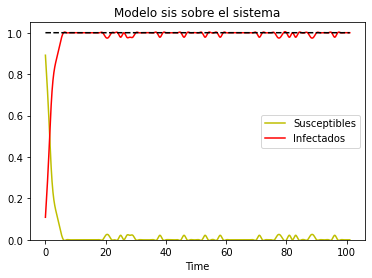

In [4]:
a = 0.2; b = 0.5
model = "sis"
system = rombo # line; square; rectangle; rombo; triangulo; fig1; fig2
neigborhoodSystemMoore = Von_Neumann(rombo)

SISmodel = models(model,a,b,rombo,neigborhoodSystemMoore,[1,0])
SISmodel.metricsPlot(100, f"Modelo {model} sobre el sistema") 

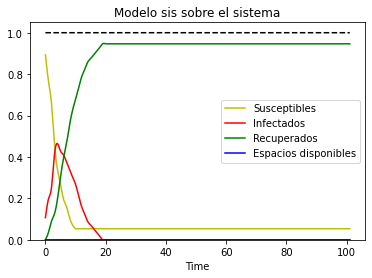

In [5]:
from EpidemiologicalModels.BirthAndMortavilityModel import *

a=0.2; b=0.5
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
ages_sys1 = agesMatrix(ranges,system)
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

system = triangulo # line; square; rectangle; rombo; triangulo; fig1; fig2
neigborhoodSystemMoore = Von_Neumann(system)

SIRmodelWithBirthsAndDeaths = models("sir_birthAndMortavility",a,b,system,neigborhoodSystemMoore,[1,0])
SIRmodelWithBirthsAndDeaths.birthRate = br; SIRmodelWithBirthsAndDeaths.probabilityOfDyingByAgeGroup = mr
SIRmodelWithBirthsAndDeaths.systemAges = ages_sys1; SIRmodelWithBirthsAndDeaths.annualUnit = 365

SIRmodelWithBirthsAndDeaths.metricsPlot(100, f"Modelo {model} sobre el sistema") 

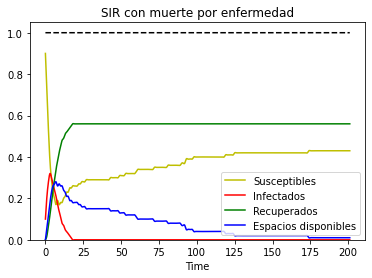

In [6]:
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]

system = initialCondition(0.1,np.zeros((10,10)))
neigborhoodSystemMoore = Von_Neumann(system)
ages_sys3 = agesMatrix(ranges,system)

SIRmodelWithDeathByDisease = models("sir_deathByDisease",0.2,0.5,system,neigborhoodSystemMoore,[1,0])
SIRmodelWithDeathByDisease.birthRate = br; SIRmodelWithDeathByDisease.probabilityOfDyingByAgeGroup = mr
SIRmodelWithDeathByDisease.deathFromDiseaseByAgeRange = ranges_dead
SIRmodelWithDeathByDisease.systemAges = ages_sys3; SIRmodelWithDeathByDisease.annualUnit = 365
SIRmodelWithDeathByDisease.metricsPlot(200,"SIR con muerte por enfermedad")

### Curvas promedio

Los ejemplos mostrados anteriormente son solo casos particulares, si quisieramos ver de mejor manera el impacto que tiene la condición de frontera en la evolución de alguna de nuestras reglas de evolución debemos simular una cantidad $n$ de escenarios y analizar el comportamiento promedio

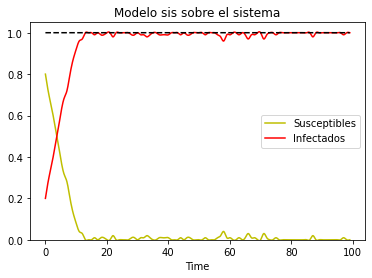

In [7]:
a = 0.2; b = 0.5
model = "sis"
system = line # line; square; rectangle; rombo; triangulo; fig1; fig2

neigborhoodSystemMoore = Von_Neumann(system)
SISmodel = models(model,a,b,line,neigborhoodSystemMoore,[1,0])

SISmodel.plotMediumCurves(0.1, 100, 10, f"Modelo {model} sobre el sistema")

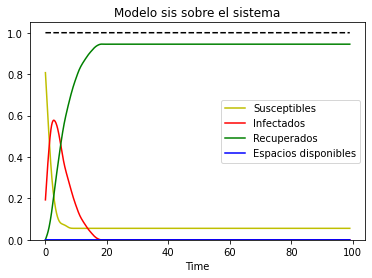

In [8]:
a=0.2; b=0.5
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

system = triangulo # line; square; rectangle; rombo; triangulo; fig1; fig2
neigborhoodSystemMoore = Von_Neumann(system)
ages_sys1 = agesMatrix(ranges,system)

SIRmodelWithBirthsAndDeaths = models("sir_birthAndMortavility",a,b,system,neigborhoodSystemMoore,[1,0])
SIRmodelWithBirthsAndDeaths.birthRate = br; SIRmodelWithBirthsAndDeaths.probabilityOfDyingByAgeGroup = mr
SIRmodelWithBirthsAndDeaths.systemAges = ages_sys1; SIRmodelWithBirthsAndDeaths.annualUnit = 365

SIRmodelWithBirthsAndDeaths.plotMediumCurves(0.1, 100, 10, f"Modelo {model} sobre el sistema")

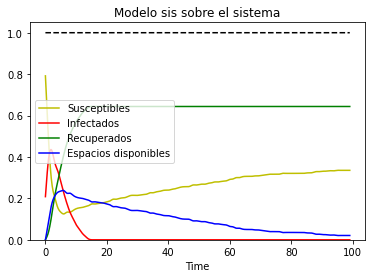

In [9]:
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]

system = fig1 # line; square; rectangle; rombo; triangulo; fig1; fig2
neigborhoodSystemMoore = Von_Neumann(system)
ages_sys3 = agesMatrix(ranges,system)

SIRmodelWithDeathByDisease = models("sir_deathByDisease",0.2,0.5,system,neigborhoodSystemMoore,[1,0])
SIRmodelWithDeathByDisease.birthRate = br; SIRmodelWithDeathByDisease.probabilityOfDyingByAgeGroup = mr
SIRmodelWithDeathByDisease.deathFromDiseaseByAgeRange = ranges_dead
SIRmodelWithDeathByDisease.systemAges = ages_sys3; SIRmodelWithDeathByDisease.annualUnit = 365

SIRmodelWithDeathByDisease.plotMediumCurves(0.1, 100, 10, f"Modelo {model} sobre el sistema")

### Comparación de curvas promedio para los diferentes espacios

In [10]:
a = 0.2; b = 0.5
model = "sis"
state = 0 # S=0; I=1; R=2; M=3
neigborhoodSystemMooreLine = Von_Neumann(line)
neigborhoodSystemMooreSquare = Von_Neumann(square)
neigborhoodSystemMooreRectangle = Von_Neumann(rectangle)
neigborhoodSystemMooreRombo = Von_Neumann(rombo)
neigborhoodSystemMooreTriangulo = Von_Neumann(triangulo)
neigborhoodSystemMooreFig1 = Von_Neumann(fig1)
neigborhoodSystemMooreFig2 = Von_Neumann(fig2)

MALine = models(model, a, b, line, neigborhoodSystemMooreLine,[1,0]).mediumCurves(0.1,30,10)[0]
MASquare = models(model, a, b, square, neigborhoodSystemMooreSquare,[1,0]).mediumCurves(0.1,30,10)[0]
MARectangle = models(model, a, b, rectangle, neigborhoodSystemMooreRectangle,[1,0]).mediumCurves(0.1,30,10)[0]
MARombo = models(model, a, b, rombo, neigborhoodSystemMooreRombo,[1,0]).mediumCurves(0.1,30,10)[0]
MATriangulo = models(model, a, b, triangulo, neigborhoodSystemMooreTriangulo,[1,0]).mediumCurves(0.1,30,10)[0]
MAFig1 = models(model, a, b, fig1, neigborhoodSystemMooreFig1,[1,0]).mediumCurves(0.1,30,10)[0]
MAFig2 = models(model, a, b, fig2, neigborhoodSystemMooreFig2,[1,0]).mediumCurves(0.1,30,10)[0]

col = ["purple", "steelblue", "darkorange", "firebrick", "seagreen", "cyan", "orangered"]
eti = ["Line", "Square", "Rectangle", "Rhombus", "Triangle", "Case # 1", "Case # 2"]
var_sis = [MALine[state], MASquare[state], MARectangle[state], MARombo[state], 
           MATriangulo[state], MAFig1[state], MAFig2[state]]

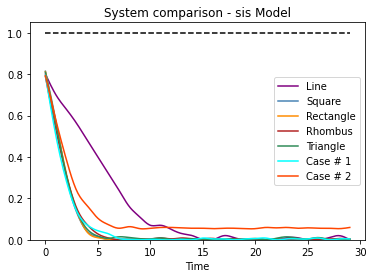

In [11]:
from EpidemiologicalModels.tools import *

graficas(var_sis,eti,col,f"System comparison - {model} Model")